# SQL

Ava Santos-Volpe  
2025-12-01

The following project uses data from the [Stanford Open Policing
Project](https://openpolicing.stanford.edu/).

Reference: Pierson, Emma, Camelia Simoiu, Jan Overgoor, Sam
Corbett-Davies, Daniel Jenson, Amy Shoemaker, Vignesh Ramachandran, et
al. 2020. “A Large-Scale Analysis of Racial Disparities in Police Stops
Across the United States.” Nature Human Behaviour, 1–10.

I am planning on comparing the arrests for different violations based on
race. I will compare this in three different cities: Little Rock (AR),
Hartford (CT), and Chicago (IL). I chose these cities because I think
the results will be pretty different and might be interesting to
compare.

In [ ]:
con_traffic <- DBI::dbConnect(
  RMariaDB::MariaDB(),
  dbname = "traffic",
  host = Sys.getenv("TRAFFIC_HOST"),
  user = Sys.getenv("TRAFFIC_USER"),
  password = Sys.getenv("TRAFFIC_PWD")
)

In [ ]:
SHOW TABLES;

In [ ]:
#| output.var: "il"
SELECT subject_race, outcome, COUNT(*) as count
FROM il_chicago_2023_01_26
WHERE outcome = "arrest"
GROUP BY subject_race
ORDER BY count DESC;

In [ ]:
SELECT *
FROM nc_charlotte_2020_04_01
LIMIT 0, 10;

In [ ]:
#| output.var: "nc"
SELECT subject_race, outcome, COUNT(*) as count
FROM nc_charlotte_2020_04_01
WHERE outcome = "arrest"
GROUP BY subject_race
ORDER BY count DESC;

In [ ]:
SELECT *
FROM ct_hartford_2020_04_01
LIMIT 0, 10;

In [ ]:
#| output.var: "ct"
SELECT subject_race, outcome, COUNT(*) as count
FROM ct_hartford_2020_04_01
WHERE outcome = "arrest"
GROUP BY subject_race
ORDER BY count DESC;

I ended up comparing the arrests based on race without looking at
violations. The naming conventions were different for the violations, so
that made it difficult to compare. I also chose to look at Charlotte
instead of Little Rock to compare with Chicago and Hartford.

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.2
✔ ggplot2   4.0.0     ✔ tibble    3.3.0
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.1.0     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Don't know how to automatically pick scale for object of type <integer64>.
Defaulting to continuous.

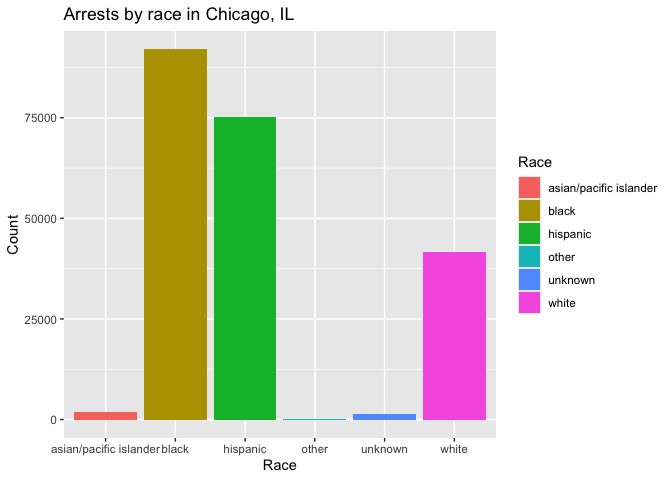

In [ ]:
#| label: il

library(tidyverse)

This graph shows arrests by race in Chicago. Black and hispanic people
had the highest number of arrests, followed by white people in the
middle and asian/Pacific Islanders last. I would be interested to
compare all of these numbers with the populations sizes by race in the
city.

Don't know how to automatically pick scale for object of type <integer64>.
Defaulting to continuous.

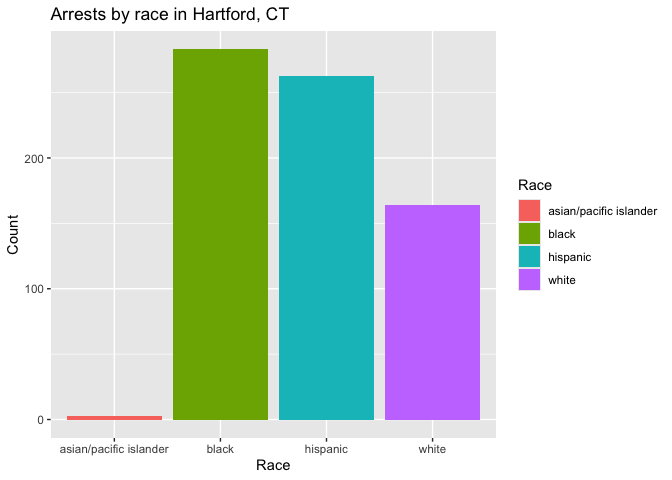

In [ ]:
#| label: ct

ggplot(ct, aes(x = subject_race, y = count, fill = subject_race)) +
  geom_bar(stat = "identity") + 
  labs(
    x = "Race",
    y = "Count",
    fill = "Race",
    title = "Arrests by race in Hartford, CT"
  )

This graph shows arrests by race in Hartford. It follows a similar
pattern to Chicago, with Black and hispanic people having the highest
number of arrests, followed by white people in the middle, and
asian/Pacific Islanders with the least.

Don't know how to automatically pick scale for object of type <integer64>.
Defaulting to continuous.

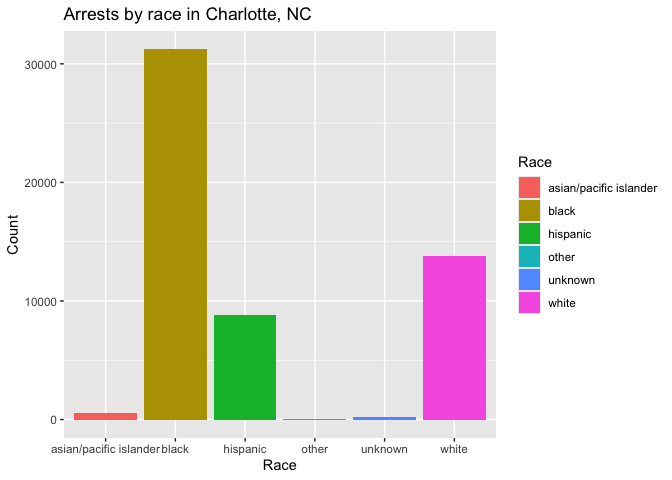

In [ ]:
#| label: nc

ggplot(nc, aes(x = subject_race, y = count, fill = subject_race)) +
  geom_bar(stat = "identity") + 
  labs(
    x = "Race",
    y = "Count",
    fill = "Race",
    title = "Arrests by race in Charlotte, NC"
  )

This is a plot of arrests made in Charlotte by race. In this plot, the
number of Black people arrested seems much higher than any other race.
The next highest race is white people, then hispanic people, then
asian/Pacific Islanders.